<a href="https://colab.research.google.com/github/among5094/AI_lecture/blob/main/5%EA%B0%95%2C6%EA%B0%95_KNN/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B0%95%EC%9D%985%EA%B0%95_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 인공지능강의 5강: KNN(K-nearest Neighbor)

- kn: 가장 근접한 이웃

# KNN

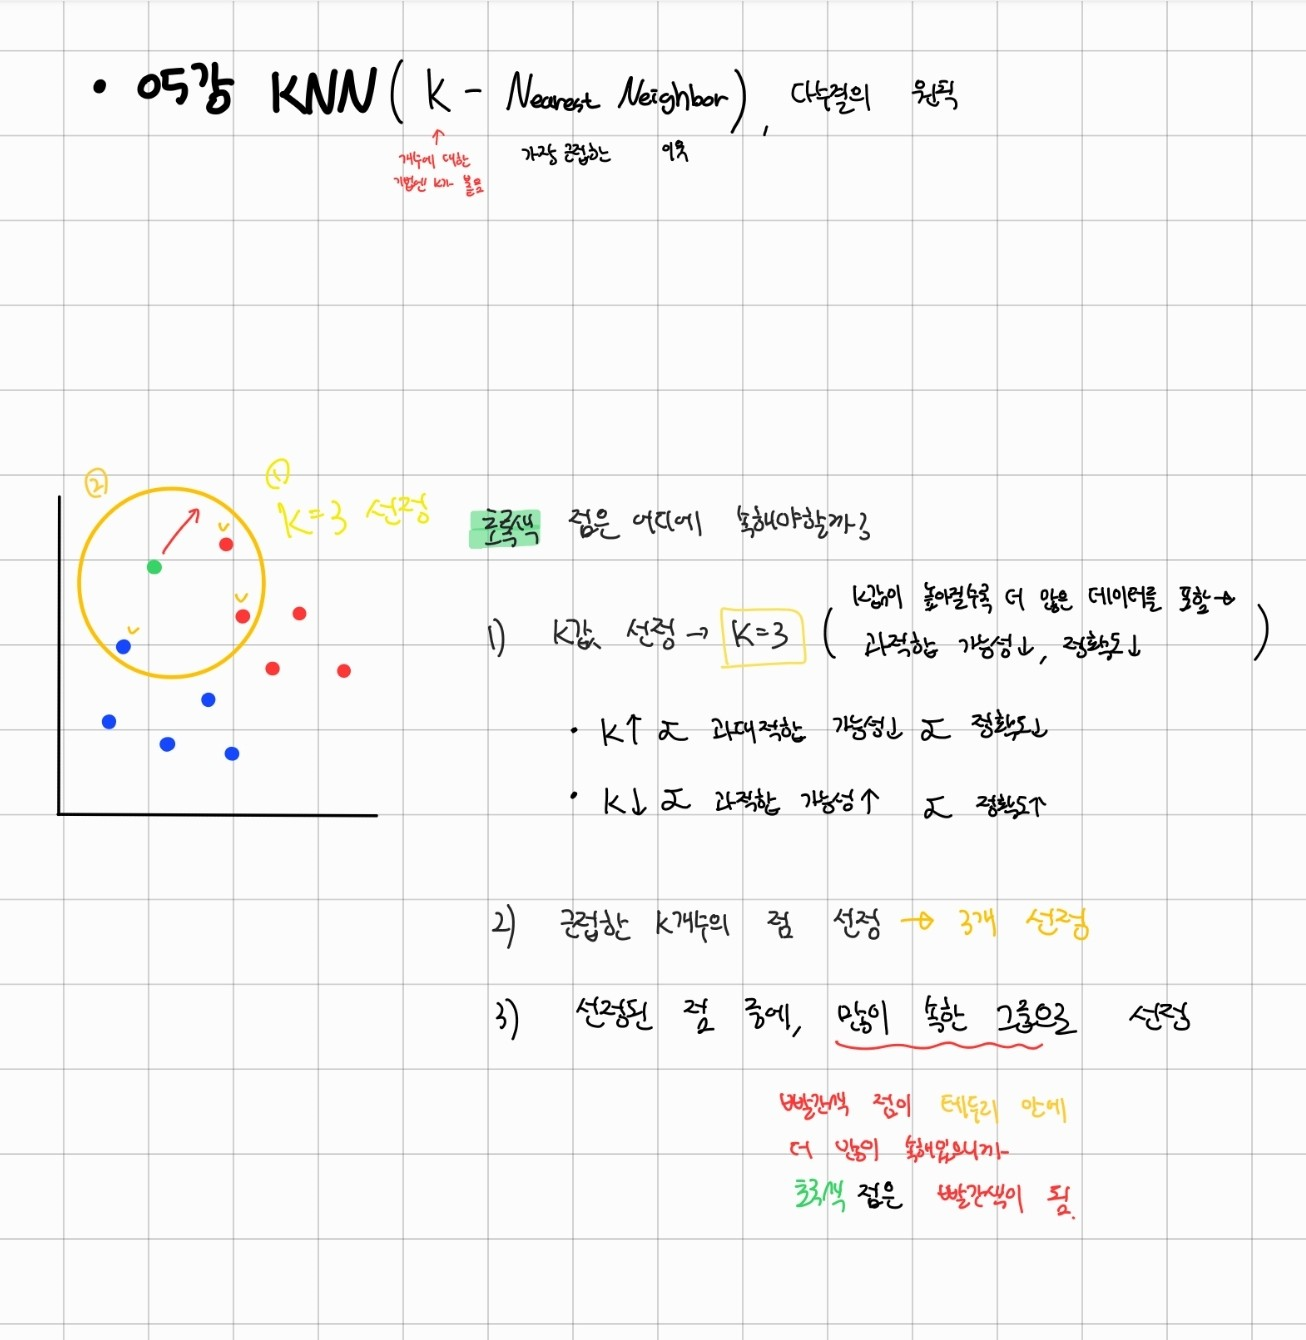


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
A=pd.read_csv("/content/drive/MyDrive/xyzData.csv") #파일 읽어오고

In [6]:
#x,y,z각각 저장하기
A_x=np.array(A['x']).reshape(-1,1)
A_y=np.array(A['y']).reshape(-1,1)
A_z=np.array(A['z']).reshape(-1,1)

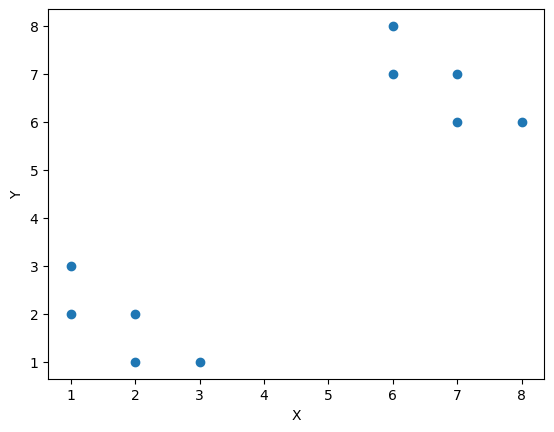

In [8]:
x=np.arange(0,10) #일정하게 떨어져 있는 숫자들을 array 형태로 반환해 주는 함수
plt.scatter(A_x, A_y) # 산점도 그리기: 두 변수의 상관 관계를 직교 좌표계의 평면에 점으로 표현하는 그래프
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [9]:
#input data (학습을 위한 데이터임)합치기
data = np.column_stack((A_x, A_y)) #튜플형태로
data #데이터확인

array([[1, 2],
       [2, 1],
       [3, 1],
       [1, 3],
       [2, 2],
       [7, 7],
       [6, 8],
       [8, 6],
       [7, 6],
       [6, 7]])

# train_test_split 에 대해

1. train_test_split: 데이터셋을 훈련 세트와 테스트 세트로 나누는 데 사용됨.

2. train_test_split 함수는 네 개의 매개변수를 받습니다.
첫 번째 매개변수인 input_data는 입력 데이터셋을 나타내고  두 번째 매개변수인 output_data는 출력(타깃) 데이터셋을 나타냄.

3. train_test_split 함수는 데이터를 무작위로 섞은 후, 기본적으로 75%의 데이터를 훈련 세트로 선택하고, 나머지 25%의 데이터를 테스트 세트로 선택함.  
즉, 훈련 세트와 테스트 세트로 데이터를 분할하여 반환하는 역할을 함.

4. 분할된 데이터셋은 네 개의 변수에 할당됩니다.  
train_input은 훈련 세트의 입력 데이터를,  
test_input은 테스트 세트의 입력 데이터를,  
train_output는 훈련 세트의 출력 데이터를,  
test_output은 테스트 세트의 출력 데이터임.


5. 이렇게 나누어진 데이터셋은 머신러닝 모델을 훈련하고, 훈련된 모델의 성능을 평가하는 데 사용될 수 있습니다.

In [11]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(data, A_z) #data: 데이터셋, A_z는 타겟
"""
train_input은 훈련 세트의 입력 데이터를,
test_input은 테스트 세트의 입력 데이터를,
train_output는 훈련 세트의 출력 데이터를,
test_output은 테스트 세트의 출력 데이터임.

"""

'\ntrain_input은 훈련 세트의 입력 데이터를,\ntest_input은 테스트 세트의 입력 데이터를,\ntrain_output는 훈련 세트의 출력 데이터를,\ntest_output은 테스트 세트의 출력 데이터임.\n\n'

In [12]:
from sklearn.neighbors import KNeighborsClassifier
#객체만들기
kn= KNeighborsClassifier(n_neighbors=3) #n_neighbors=3은 이론에서 배운 k값에 해당함

In [13]:
#학습시키기
kn.fit(train_input, train_output)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [15]:
#평가해보기
kn.score(test_input, test_output)

1.0

In [14]:
#예측해보기
kn.predict(test_input)

array([1, 1, 0])

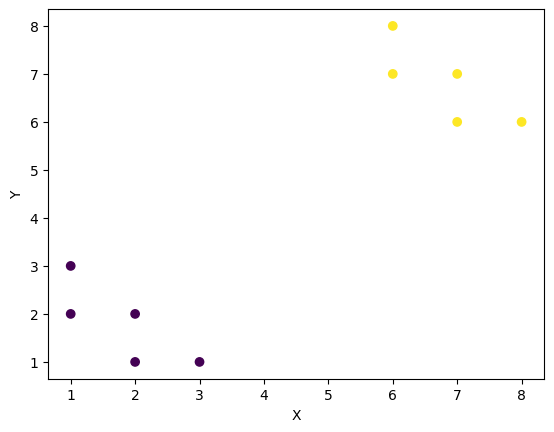

In [16]:
# c추가 -> 시각화해보기

x=np.arange(0,10) #일정하게 떨어져 있는 숫자들을 array 형태로 반환해 주는 함수
plt.scatter(A_x, A_y, c=kn.predict(data)) # 산점도 그리기: 두 변수의 상관 관계를 직교 좌표계의 평면에 점으로 표현하는 그래프
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#결과: 한 쪽이 0, 한 쪽이 1임

In [19]:
#값 넣어보기 -> 2차원 데이터로 reshape해줬기 때문에 [[]] 형태로 감싸줘야함
kn.predict([[8,8]]), kn.predict([[1,1]])

(array([1]), array([0]))